# BIG DATA ANALYTICS: Dealing with Overfitting
- DNN에서 Overfitting에 대응하는 방법에 대해서 배우겠습니다.
- Sources:
    - https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#%EA%B3%BC%EB%8C%80%EC%A0%81%ED%95%A9%EC%9D%84_%EB%B0%A9%EC%A7%80%ED%95%98%EA%B8%B0_%EC%9C%84%ED%95%9C_%EC%A0%84%EB%9E%B5
---

## 1. 라이브러리 Import

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc1


## 2. 데이터 로드 및 전처리

In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 23s 1us/step


## 3. 모델 정의

In [3]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


## 4. 기본 모델 훈련

In [4]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
25000/25000 - 1s - loss: 0.5936 - accuracy: 0.6799 - binary_crossentropy: 0.5936 - val_loss: 0.4349 - val_accuracy: 0.8122 - val_binary_crossentropy: 0.4349
Epoch 2/20
25000/25000 - 0s - loss: 0.3670 - accuracy: 0.8455 - binary_crossentropy: 0.3670 - val_loss: 0.3455 - val_accuracy: 0.8544 - val_binary_crossentropy: 0.3455
Epoch 3/20
25000/25000 - 0s - loss: 0.3191 - accuracy: 0.8674 - binary_crossentropy: 0.3191 - val_loss: 0.3325 - val_accuracy: 0.8584 - val_binary_crossentropy: 0.3325
Epoch 4/20
25000/25000 - 0s - loss: 0.3050 - accuracy: 0.8729 - binary_crossentropy: 0.3050 - val_loss: 0.3303 - val_accuracy: 0.8592 - val_binary_crossentropy: 0.3303
Epoch 5/20
25000/25000 - 0s - loss: 0.2973 - accuracy: 0.8776 - binary_crossentropy: 0.2973 - val_loss: 0.3295 - val_accuracy: 0.8594 - val_binary_crossentropy: 0.3295
Epoch 6/20
25000

## 5. 파라미터 수가 적은 모델 훈련

In [5]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [6]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6662 - accuracy: 0.6126 - binary_crossentropy: 0.6662 - val_loss: 0.6079 - val_accuracy: 0.7344 - val_binary_crossentropy: 0.6079
Epoch 2/20
25000/25000 - 0s - loss: 0.5286 - accuracy: 0.7985 - binary_crossentropy: 0.5286 - val_loss: 0.4599 - val_accuracy: 0.8260 - val_binary_crossentropy: 0.4599
Epoch 3/20
25000/25000 - 0s - loss: 0.4063 - accuracy: 0.8415 - binary_crossentropy: 0.4063 - val_loss: 0.3815 - val_accuracy: 0.8464 - val_binary_crossentropy: 0.3815
Epoch 4/20
25000/25000 - 0s - loss: 0.3518 - accuracy: 0.8580 - binary_crossentropy: 0.3518 - val_loss: 0.3524 - val_accuracy: 0.8529 - val_binary_crossentropy: 0.3524
Epoch 5/20
25000/25000 - 0s - loss: 0.3280 - accuracy: 0.8663 - binary_crossentropy: 0.3280 - val_loss: 0.3393 - val_accuracy: 0.8568 - val_binary_crossentropy: 0.3393
Epoch 6/20
25000/25000 - 0s - loss: 0.3151 - accuracy: 0.8696 - binary_crossentropy: 0.3151 - val_loss: 0.3328

## 5. 파라미터 수가 많은 모델 훈련

In [7]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [8]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 2s - loss: 0.4489 - accuracy: 0.7847 - binary_crossentropy: 0.4489 - val_loss: 0.3424 - val_accuracy: 0.8546 - val_binary_crossentropy: 0.3424
Epoch 2/20
25000/25000 - 1s - loss: 0.2942 - accuracy: 0.8775 - binary_crossentropy: 0.2942 - val_loss: 0.3284 - val_accuracy: 0.8572 - val_binary_crossentropy: 0.3284
Epoch 3/20
25000/25000 - 1s - loss: 0.2369 - accuracy: 0.9071 - binary_crossentropy: 0.2369 - val_loss: 0.3613 - val_accuracy: 0.8470 - val_binary_crossentropy: 0.3613
Epoch 4/20
25000/25000 - 1s - loss: 0.1334 - accuracy: 0.9552 - binary_crossentropy: 0.1334 - val_loss: 0.4006 - val_accuracy: 0.8506 - val_binary_crossentropy: 0.4006
Epoch 5/20
25000/25000 - 1s - loss: 0.0324 - accuracy: 0.9943 - binary_crossentropy: 0.0324 - val_loss: 0.5203 - val_accuracy: 0.8460 - val_binary_crossentropy: 0.5203
Epoch 6/20
25000/25000 - 1s - loss: 0.0063 - accuracy: 0.9995 - binary_crossentropy: 0.0063 - val_loss: 0.6099

## 6. 파라미터 수가 Overfitting에 미치는 영향 확인하기

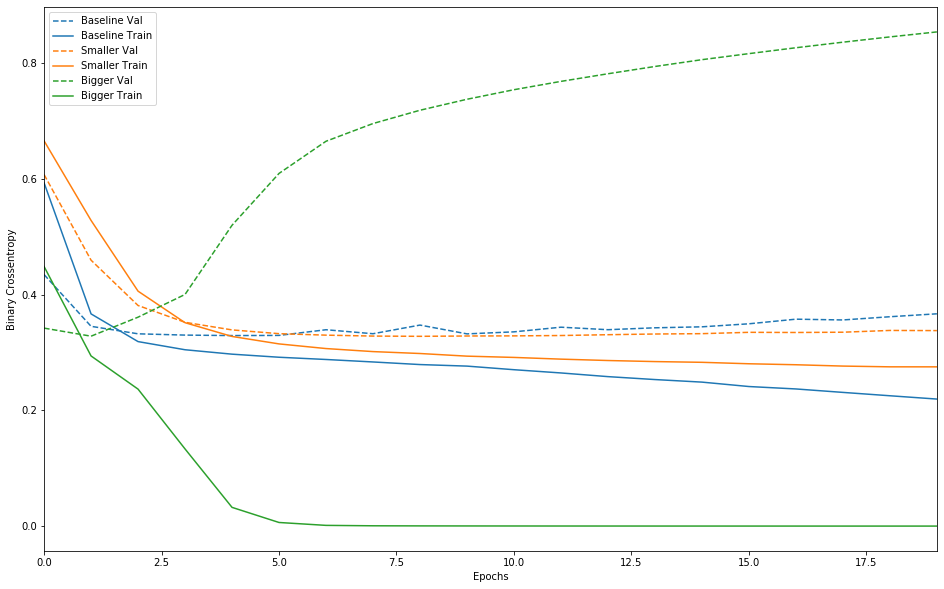

In [9]:
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

## Option1. 가중치를 규제하기

In [10]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6174 - accuracy: 0.7096 - binary_crossentropy: 0.5727 - val_loss: 0.4713 - val_accuracy: 0.8210 - val_binary_crossentropy: 0.4290
Epoch 2/20
25000/25000 - 0s - loss: 0.4068 - accuracy: 0.8479 - binary_crossentropy: 0.3651 - val_loss: 0.3865 - val_accuracy: 0.8560 - val_binary_crossentropy: 0.3456
Epoch 3/20
25000/25000 - 0s - loss: 0.3622 - accuracy: 0.8665 - binary_crossentropy: 0.3222 - val_loss: 0.3696 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3308
Epoch 4/20
25000/25000 - 0s - loss: 0.3486 - accuracy: 0.8720 - binary_crossentropy: 0.3107 - val_loss: 0.3660 - val_accuracy: 0.8612 - val_binary_crossentropy: 0.3292
Epoch 5/20
25000/25000 - 0s - loss: 0.3411 - accuracy: 0.8744 - binary_crossentropy: 0.3050 - val_loss: 0.3630 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3278
Epoch 6/20
25000/25000 - 0s - loss: 0.3371 - accuracy: 0.8758 - binary_crossentropy: 0.3026 - val_loss: 0.3681

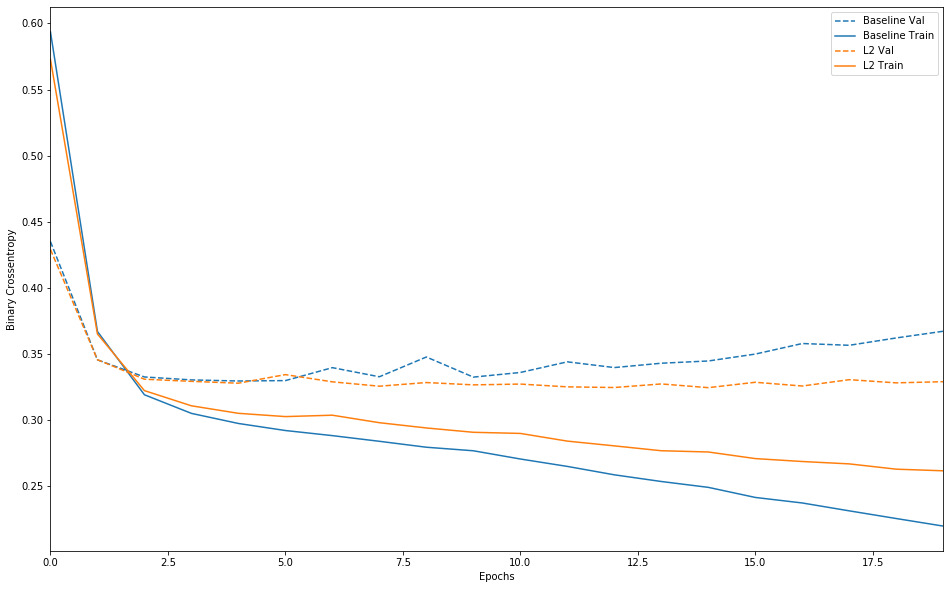

In [11]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

## Option2. Dropout Layer 추가

In [12]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 1s - loss: 0.6878 - accuracy: 0.5478 - binary_crossentropy: 0.6878 - val_loss: 0.6569 - val_accuracy: 0.7083 - val_binary_crossentropy: 0.6569
Epoch 2/20
25000/25000 - 0s - loss: 0.6181 - accuracy: 0.6546 - binary_crossentropy: 0.6181 - val_loss: 0.5139 - val_accuracy: 0.8083 - val_binary_crossentropy: 0.5139
Epoch 3/20
25000/25000 - 0s - loss: 0.5229 - accuracy: 0.7452 - binary_crossentropy: 0.5229 - val_loss: 0.4187 - val_accuracy: 0.8369 - val_binary_crossentropy: 0.4187
Epoch 4/20
25000/25000 - 0s - loss: 0.4622 - accuracy: 0.7893 - binary_crossentropy: 0.4622 - val_loss: 0.3699 - val_accuracy: 0.8517 - val_binary_crossentropy: 0.3699
Epoch 5/20
25000/25000 - 0s - loss: 0.4229 - accuracy: 0.8176 - binary_crossentropy: 0.4229 - val_loss: 0.3424 - val_accuracy: 0.8581 - val_binary_crossentropy: 0.3424
Epoch 6/20
25000/25000 - 0s - loss: 0.3944 - accuracy: 0.8368 - binary_crossentropy: 0.3944 - val_loss: 0.3307

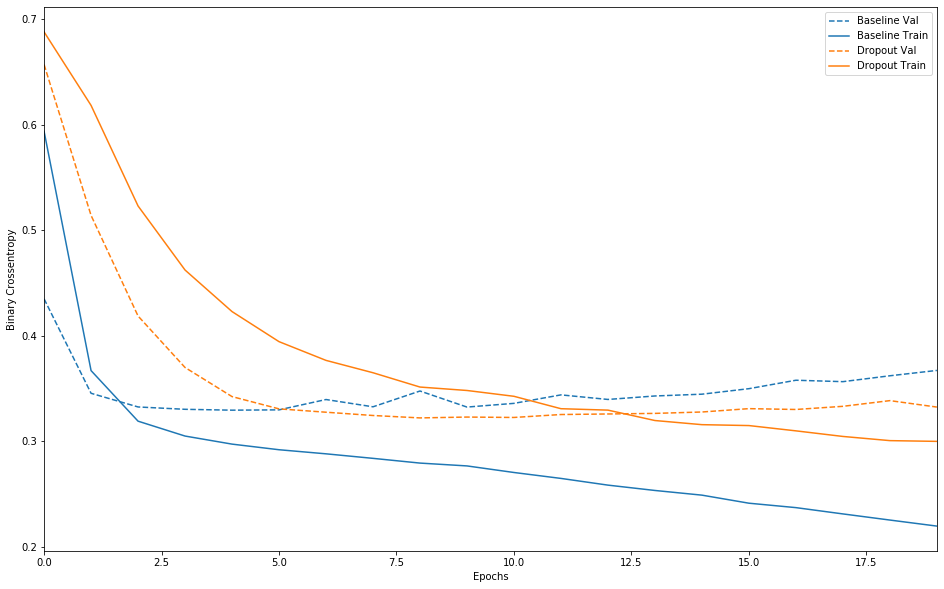

In [13]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])